Class distribution:
 target
0    1382
1     217
Name: count, dtype: int64
Imbalance ratio ≈ 1:6.37


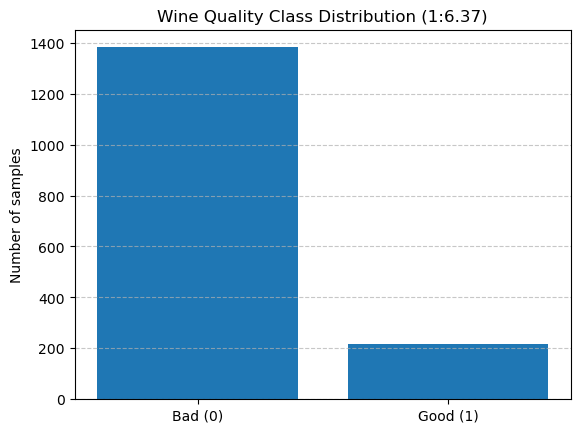


=== Classification Report ===
              precision    recall  f1-score   support

           0      0.904     0.982     0.941       277
           1      0.737     0.326     0.452        43

    accuracy                          0.894       320
   macro avg      0.820     0.654     0.696       320
weighted avg      0.881     0.894     0.875       320

=== Confusion Matrix ===
[[272   5]
 [ 29  14]]
ROC-AUC: 0.8678532448996725


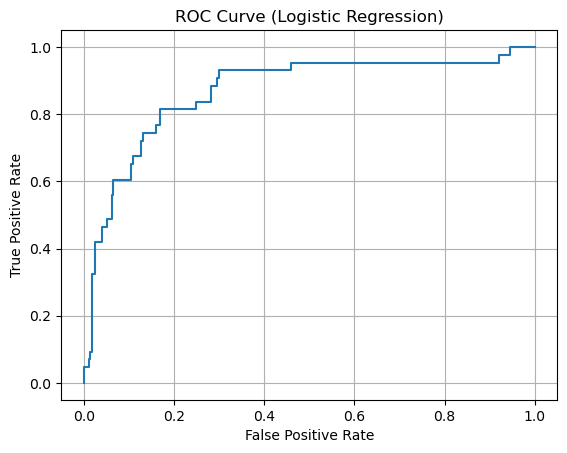

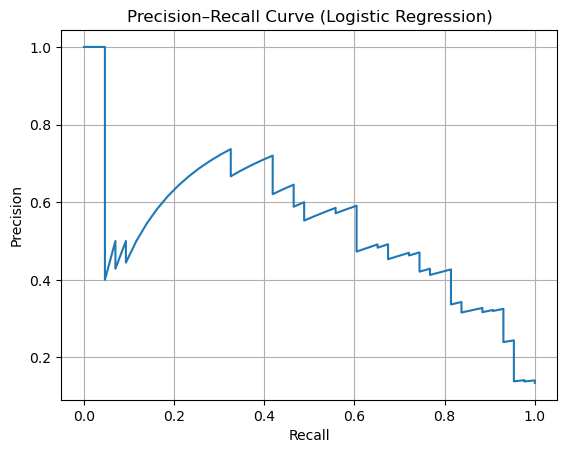

In [1]:
# ==============================================================
# Exercise 1: Detecting and Evaluating Class Imbalance
# Dataset: Wine Quality (binary classification)
# ==============================================================

# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# --- 2. Load dataset ---
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

# --- 3. Create a binary target ---
data['target'] = (data['quality'] >= 7).astype(int)

# --- 4. Explore the class distribution ---
class_counts = data['target'].value_counts()
print("Class distribution:\n", class_counts)

# Compute imbalance ratio
minority = class_counts.min()
majority = class_counts.max()
ratio = majority / minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")

# Visualize
plt.bar(['Bad (0)', 'Good (1)'], class_counts)
plt.title(f"Wine Quality Class Distribution (1:{ratio:.2f})")
plt.ylabel("Number of samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 5. Train-test split ---
X = data.drop(columns=['quality', 'target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 6. Train baseline Logistic Regression ---
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# --- 7. Evaluate baseline model ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=3))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# --- 8. Visualize model performance ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Precision–Recall Curve (Logistic Regression)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()